In [1]:
import matplotlib.pyplot as plt; from matplotlib.gridspec import GridSpec
import ast; import os

def get_data(v):
    file = open(os.getcwd()+f"\Instances\{v}.txt","r")
    v = file.read()
    v = ast.literal_eval(v)
    file.close()
    return v
print(os.getcwd())


def import_instances_MSq():
    M = [5,10,15]; S= [1,10,15,25]; q_dist = [[1,15]]; num_episodes = 20; keys = ["st","myo"]
    #M = [5,10,15]; S= [1,10,15,25]; q_dist = [[1,15],[6,20],[11,25]]; num_episodes = 20; keys = ["st","myo"]
    inst = {}
    for m in M:
        for s in S:
            for q in q_dist:
                try:
                    inst[(m,s,tuple(q))] = get_data((m,s,tuple(q)))[(m,s,tuple(q))]
                except:
                    continue
    return inst, num_episodes, keys, M, S, q_dist

def import_instances_Sqd():
    S= [1,10,15,25]; q_dist = [[1,15],[6,20],[11,25]]; d_dist = [[2,0.5],[2,1]]; num_episodes = 20; keys = ["st","myo"]
    inst = {}
    for d in d_dist:
        for s in S:
            for q in q_dist:
                try:
                    inst[(s,tuple(q),tuple(d))] = get_data((s,tuple(q),tuple(d)))[(s,tuple(q),tuple(d))]
                except:
                    continue
    return inst, num_episodes, keys, S, q_dist, d_dist



c:\Users\juan_\OneDrive - Universidad de los Andes\Documentos\SD-IB-IRP-PP\Environment


In [2]:

def axis_lims_MSq(inst, num_episodes, keys, M, S, q_dist):
    
    def get_list(ind, ref_p):
        lista = [inst[(m,s,tuple(q_dist))][ind][ep][alg] for m in M for s in S for ep in range(num_episodes) for alg in keys]
        ub = (int(max(lista)/ref_p)+1)*ref_p
        if ind < 4:
            lb = (int(min(lista)/ref_p)-1)*ref_p
        else:
            lb = 0
        
        return lb,ub

    lb_cost, ub_cost = get_list(1, 50e3)
    lb_runt, ub_runt = get_list(2, 25)
    lb_serv, ub_serv = get_list(3, 0.05)
    lb_per, ub_per = get_list(4, 10)

    return (lb_cost,ub_cost), (lb_runt,ub_runt), (lb_serv,ub_serv), (lb_per,ub_per)

def axis_lims_Sqd(inst, num_episodes, keys, S, q_dist, d):
    
    def get_list(ind, ref_p):
        lista = [inst[(s,tuple(q),tuple(d))][ind][ep][alg] for s in S for q in q_dist for ep in range(num_episodes) for alg in keys if (s,tuple(q),tuple(d)) != (25,(11,25),(2,0.5))]
        ub = (int(max(lista)/ref_p)+1)*ref_p
        if ind < 4:
            lb = (int(min(lista)/ref_p)-1)*ref_p
        else:
            lb = 0
        
        return lb,ub

    lb_cost, ub_cost = get_list(1, 50e3)
    lb_runt, ub_runt = get_list(2, 25)
    lb_serv, ub_serv = get_list(3, 0.05)
    lb_per, ub_per = get_list(4, 10)

    return (lb_cost,ub_cost), (lb_runt,ub_runt), (lb_serv,ub_serv), (lb_per,ub_per)

In [12]:

def display_metrics_MSq(inst, num_episodes, keys, M, S, q_dist):
    for q in q_dist:
        for ind in range(1,5):
            max_vals = axis_lims_MSq(inst,num_episodes,keys,M,S,q)

            fig = plt.figure(figsize=(5*len(S),5*len(M)))
            if ind == 1:
                fig.suptitle("Total Cost performances",fontsize=20,y=0.94)
            elif ind == 2:
                fig.suptitle("Running Time performances",fontsize=20,y=0.94)
            elif ind == 3:
                fig.suptitle("Service Level performances",fontsize=20,y=0.94)
            else:
                fig.suptitle("Perished products performances",fontsize=20,y=0.94)  
            gs = GridSpec(len(M), len(S), figure=fig, wspace=0.05, hspace=0.05, width_ratios=[1 for i in range(len(S))])

            ax = {}
            lb,ub = max_vals[ind-1]
            if ind != 3:
                ticks = [i for i in range(int(lb),int(ub+10),int((ub-lb)/3))]
            else:
                ticks = [i/100 for i in range(int(lb*100),int(ub*100+10),int(100*(ub-lb)/3))]
            cols = ["darkturquoise","gold"]
            flierprops = {keys[0]:{"marker":"o", "markeredgecolor":cols[0] ,"markerfacecolor":cols[0]}, keys[1]:{"marker":"o","markeredgecolor":cols[1] , "markerfacecolor":cols[1]}}
            for m in range(len(M)):
                for s in range(len(S)):
                    
                    ax[m,s] = fig.add_subplot(gs[m,s])
                    ax[m,s].set_ylim(lb,ub)
                    ax[m,s].set_xlim(-0.5,1.5)
                    ax[m,s].set_yticks([])
                    
                    
                    box1 = ax[m,s].boxplot([inst[(M[m],S[s],tuple(q))][ind][ep][keys[0]] for ep in range(num_episodes)],positions=[0],widths=[0.8],flierprops=flierprops[keys[0]],patch_artist=True)
                    box2 = ax[m,s].boxplot([inst[(M[m],S[s],tuple(q))][ind][ep][keys[1]] for ep in range(num_episodes)],positions=[1],widths=[0.8],flierprops=flierprops[keys[1]],patch_artist=True)
                    j = 0
                    for boxi in [box1,box2]:
                        for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
                            if item != 'medians':
                                plt.setp(boxi[item], color=cols[j])
                            else:
                                plt.setp(boxi[item], color="white")
                        j += 1


                    if m == 0:
                        ax[m,s].set_title(f"|S| = {S[s]}", fontsize=16)


                    if m == len(M)-1:
                        ax[m,s].set_xticks([0,1])
                        ax[m,s].set_xticklabels(["Stochastic", "Myopic"])
                    else:
                        ax[m,s].set_xticks([])

                ax[m,0].set_ylabel(f"|M| = {M[m]}",fontsize=15,rotation=0, labelpad=40)
                ax[m,0].set_yticks(ticks)
                if ind == 1:
                    ax[m,0].set_yticklabels(["${:,.0f}K".format(int(i/1e3)) for i in ticks])
                elif ind == 3:
                    ax[m,0].set_yticklabels(["{:,.2%}".format(i) for i in ticks])


def display_metrics_Sqd(inst, num_episodes, keys, S, q_dist, d_dist):
    for d in d_dist:
        for ind in range(1,5):
            max_vals = axis_lims_Sqd(inst, num_episodes, keys, S, q_dist, d)

            fig = plt.figure(figsize=(5*len(S),5*len(q_dist)))
            if ind == 1:
                fig.suptitle(f"Total Cost performances, d ~ LogNormal{tuple(d)}",fontsize=20,y=0.94)
            elif ind == 2:
                fig.suptitle(f"Running Time performances, d ~ LogNormal{tuple(d)}",fontsize=20,y=0.94)
            elif ind == 3:
                fig.suptitle(f"Service Level performances, d ~ LogNormal{tuple(d)}",fontsize=20,y=0.94)
            else:
                fig.suptitle(f"Perished products performances, d ~ LogNormal{tuple(d)}",fontsize=20,y=0.94)  
            gs = GridSpec(len(q_dist), len(S), figure=fig, wspace=0.05, hspace=0.05, width_ratios=[1 for i in range(len(S))])

            ax = {}
            lb,ub = max_vals[ind-1]
            if ind != 3:
                ticks = [i for i in range(int(lb),int(ub+10),int((ub-lb)/3))]
            else:
                ticks = [i/100 for i in range(int(lb*100),int(ub*100+10),int(100*(ub-lb)/3))]
            cols = ["darkturquoise","gold"]
            flierprops = {keys[0]:{"marker":"o", "markeredgecolor":cols[0] ,"markerfacecolor":cols[0]}, keys[1]:{"marker":"o","markeredgecolor":cols[1] , "markerfacecolor":cols[1]}}
            for q in range(len(q_dist)):
                for s in range(len(S)):
                    
                    ax[q,s] = fig.add_subplot(gs[q,s])
                    ax[q,s].set_ylim(lb,ub)
                    ax[q,s].set_xlim(-0.5,1.5)
                    ax[q,s].set_yticks([])
                    #(25, (11, 25), (2, 0.5))
                    if (S[s],tuple(q_dist[q]),tuple(d)) != (25, (11, 25), (2, 0.5)):
                        box1 = ax[q,s].boxplot([inst[(S[s],tuple(q_dist[q]),tuple(d))][ind][ep][keys[0]] for ep in range(num_episodes)],positions=[0],widths=[0.8],flierprops=flierprops[keys[0]],patch_artist=True)
                        box2 = ax[q,s].boxplot([inst[(S[s],tuple(q_dist[q]),tuple(d))][ind][ep][keys[1]] for ep in range(num_episodes)],positions=[1],widths=[0.8],flierprops=flierprops[keys[1]],patch_artist=True)
                        j = 0
                        for boxi in [box1,box2]:
                            for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
                                if item != 'medians':
                                    plt.setp(boxi[item], color=cols[j])
                                else:
                                    plt.setp(boxi[item], color="white")
                            j += 1


                    if q == 0:
                        ax[q,s].set_title(f"|S| = {S[s]}", fontsize=16)

                    if q == len(q_dist)-1:
                        ax[q,s].set_xticks([0,1])
                        ax[q,s].set_xticklabels(["Stochastic", "Myopic"])
                    else:
                        ax[q,s].set_xticks([])

                ax[q,0].set_ylabel(f"q ~ U{tuple(q_dist[q])}",fontsize=15,rotation=0, labelpad=40)
                ax[q,0].set_yticks(ticks)
                if ind == 1:
                    ax[q,0].set_yticklabels(["${:,.0f}K".format(int(i/1e3)) for i in ticks])
                elif ind == 3:
                    ax[q,0].set_yticklabels(["{:,.2%}".format(i) for i in ticks])


In [4]:
""" inst, num_episodes, keys, M, S, q = import_instances_MSq()
display_metrics_MSq(inst, num_episodes, keys, M, S, q) """

' inst, num_episodes, keys, M, S, q = import_instances_MSq()\ndisplay_metrics_MSq(inst, num_episodes, keys, M, S, q) '

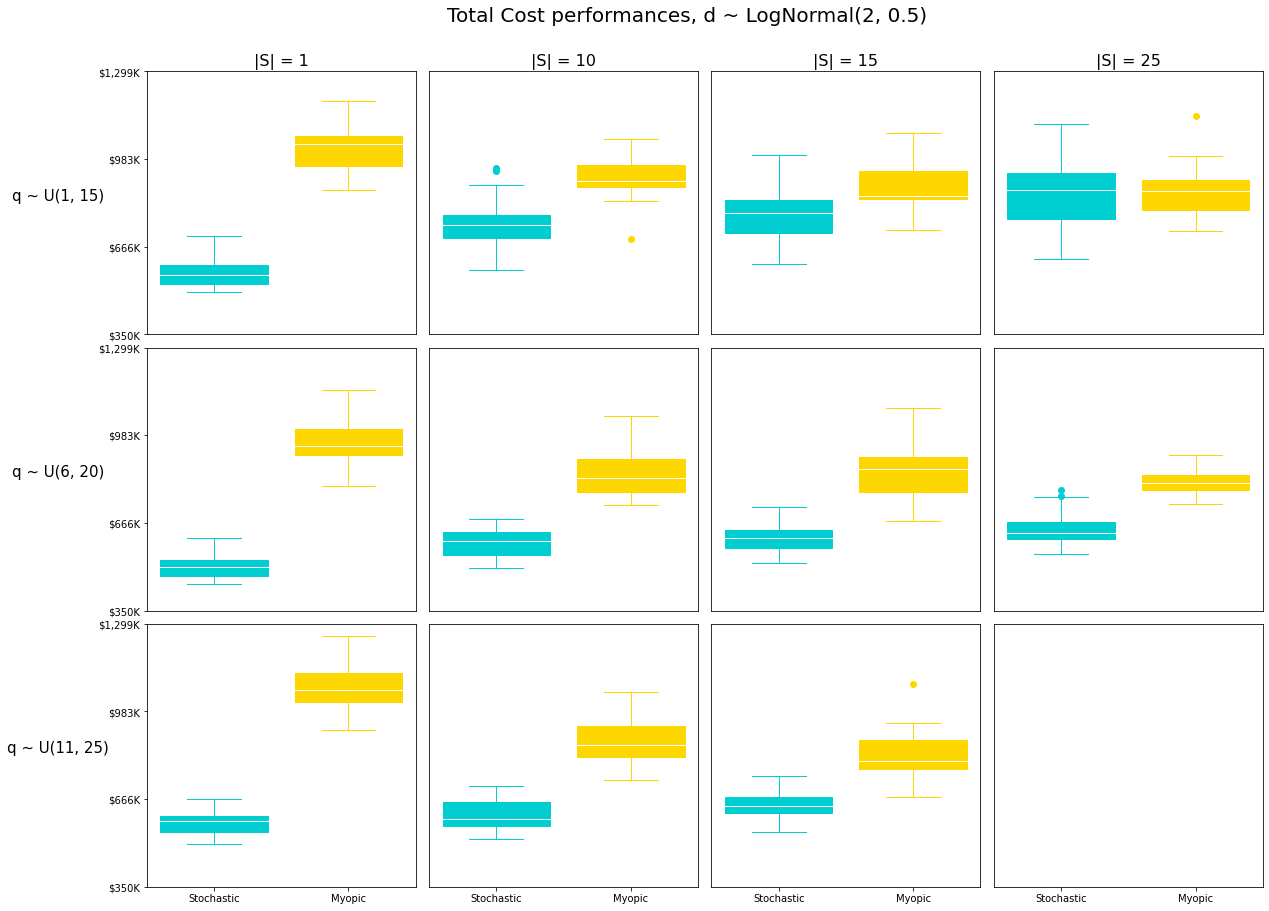

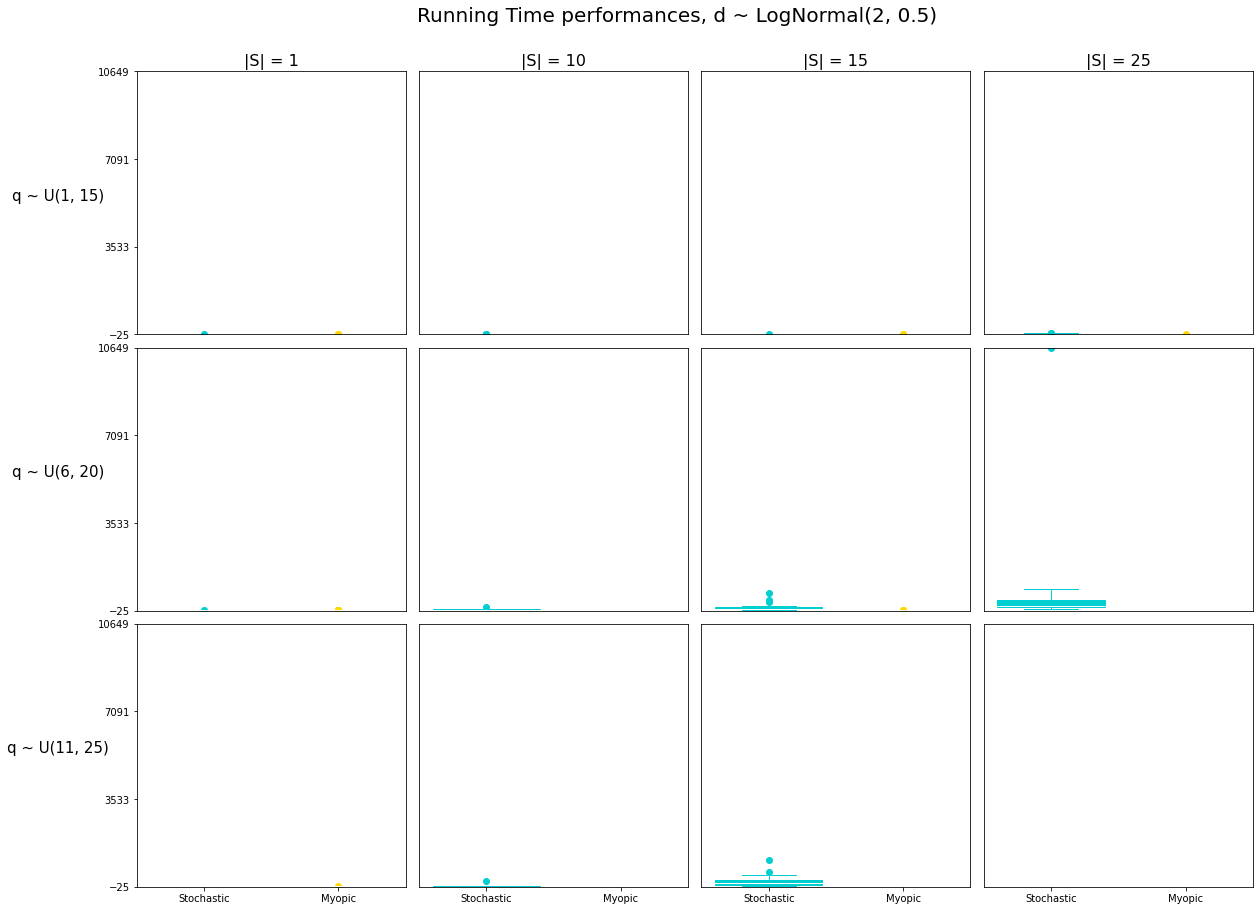

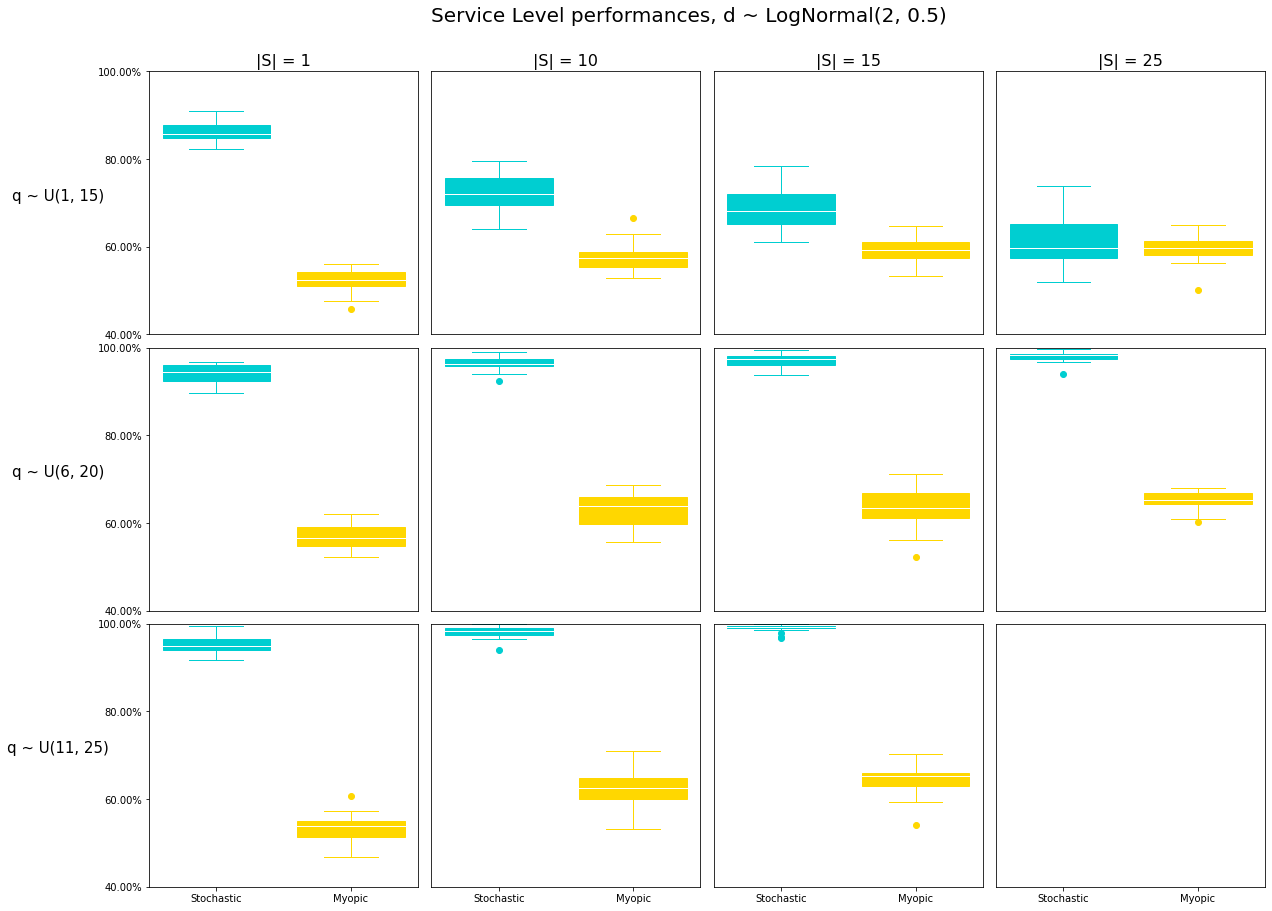

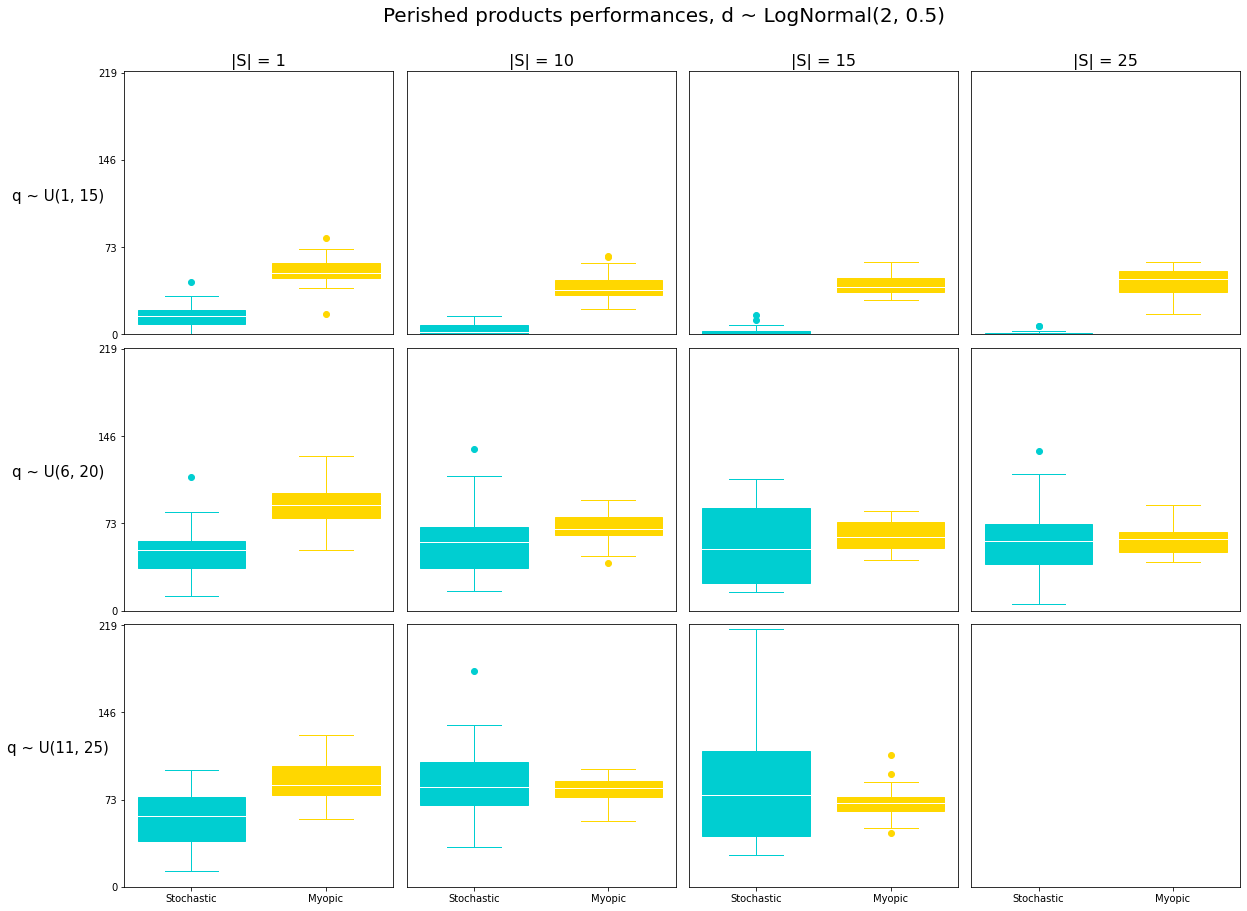

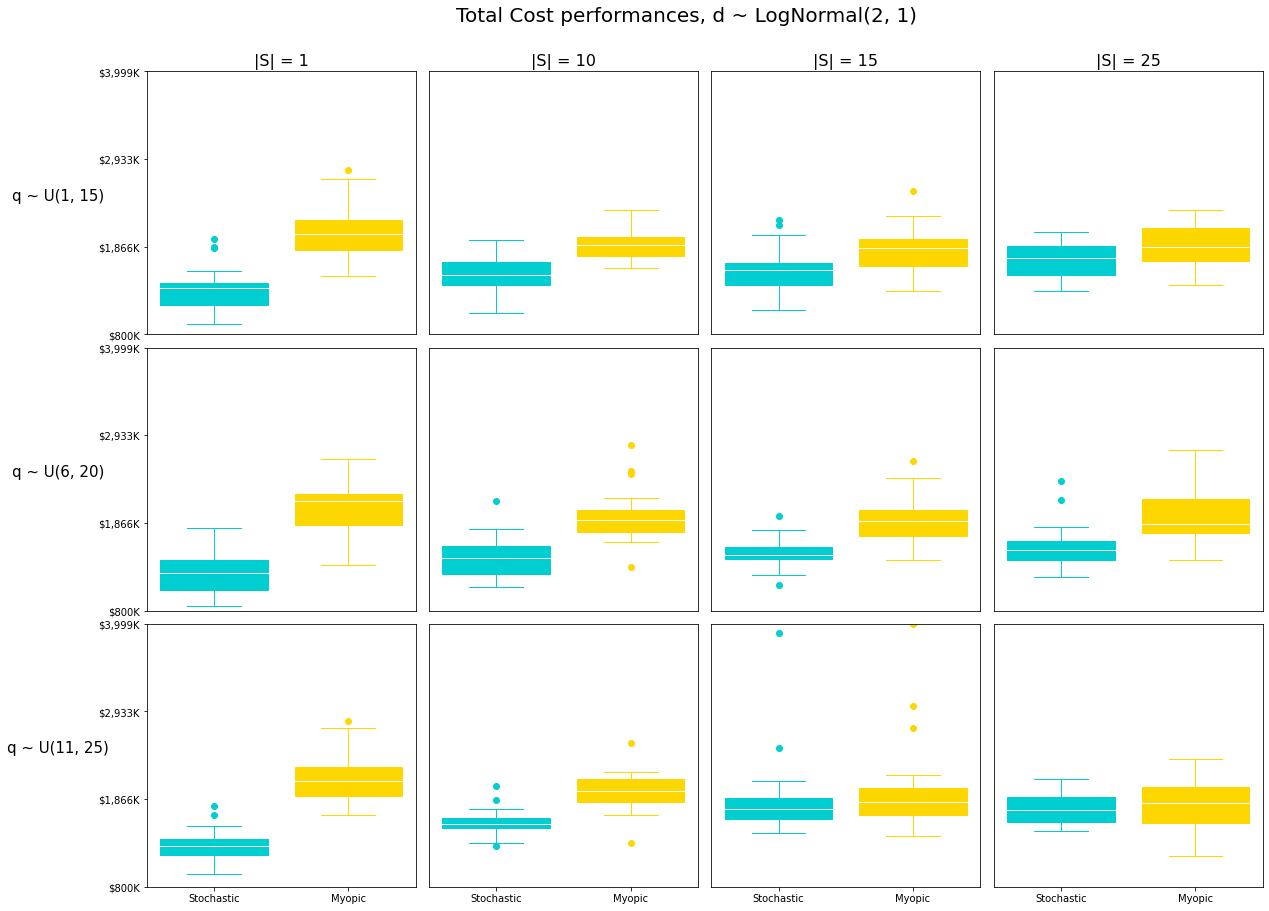

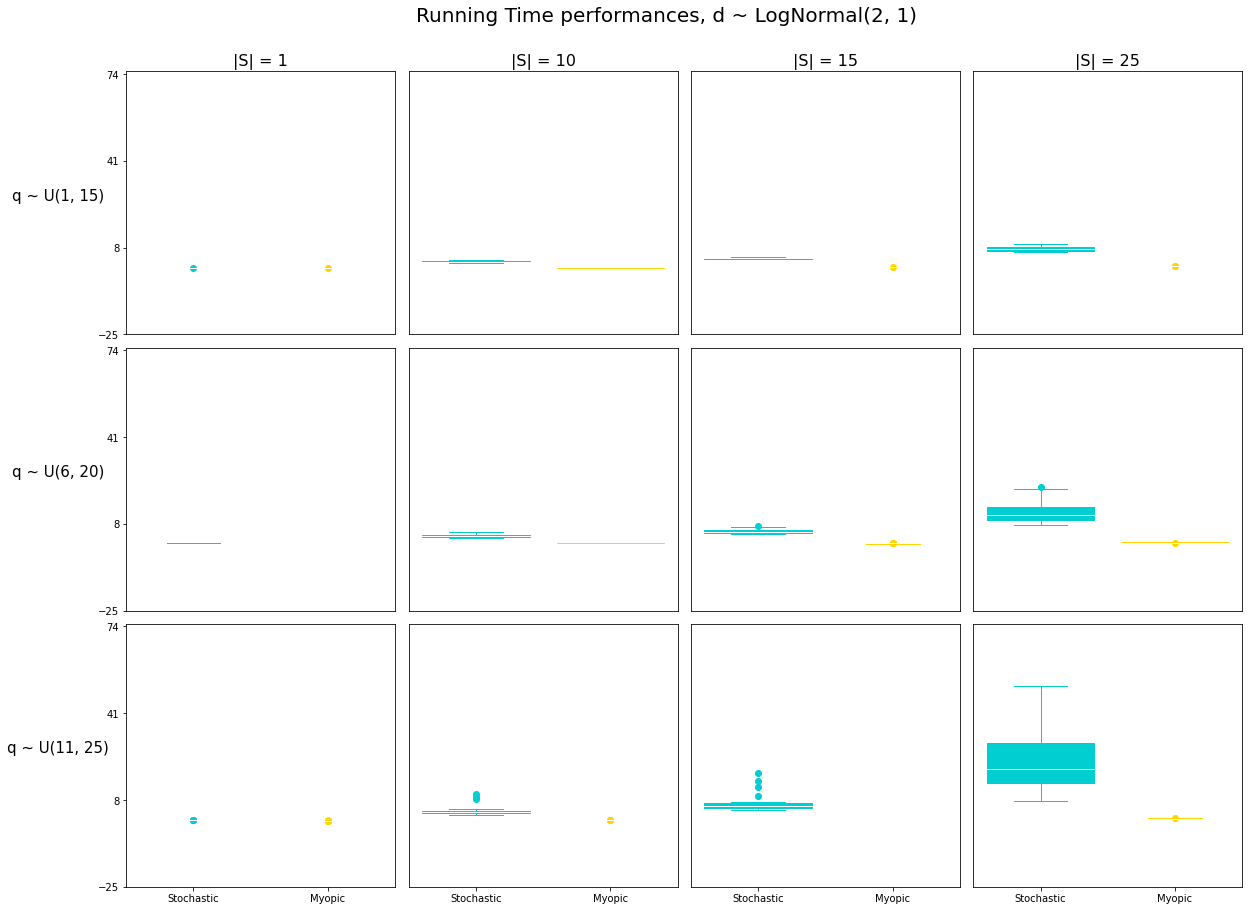

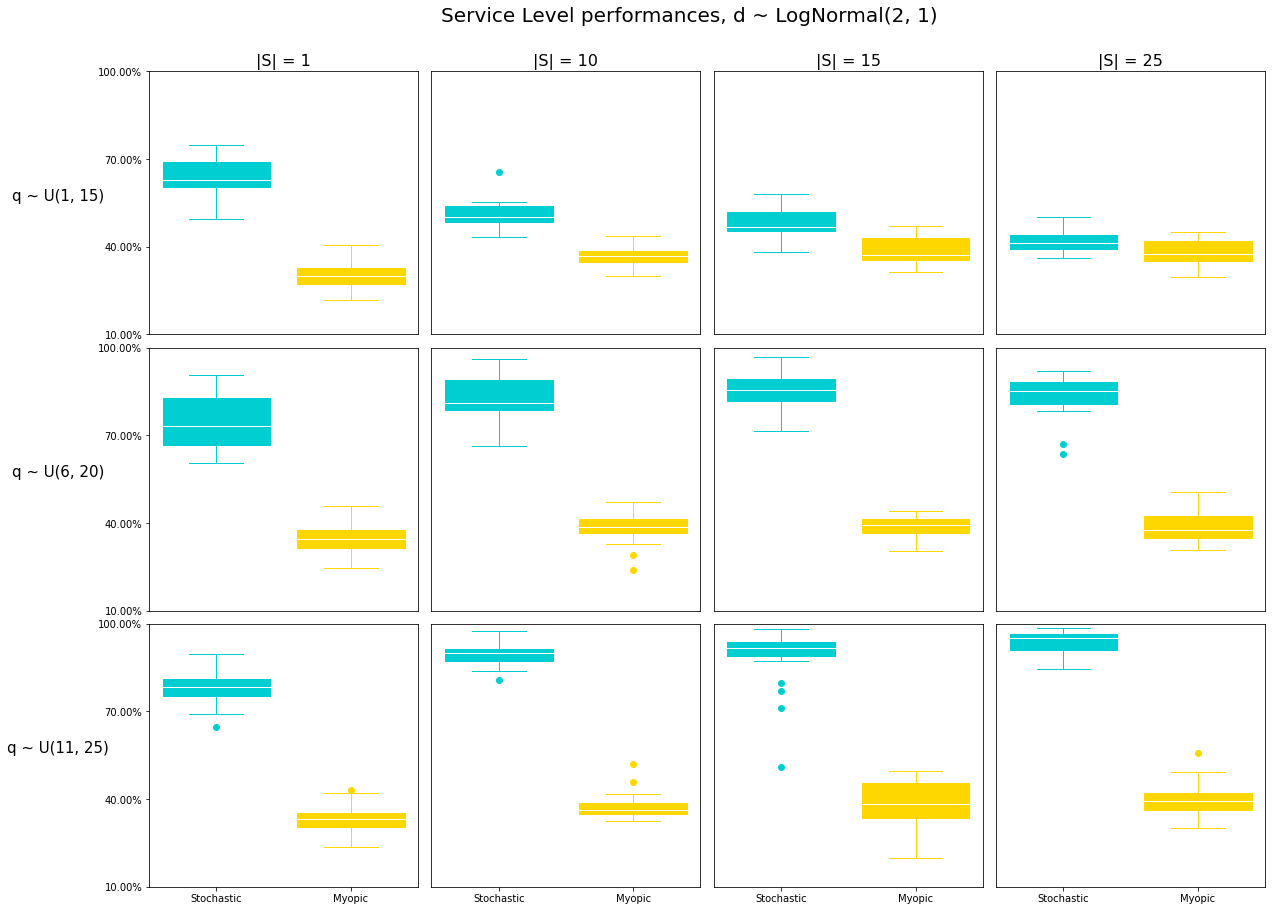

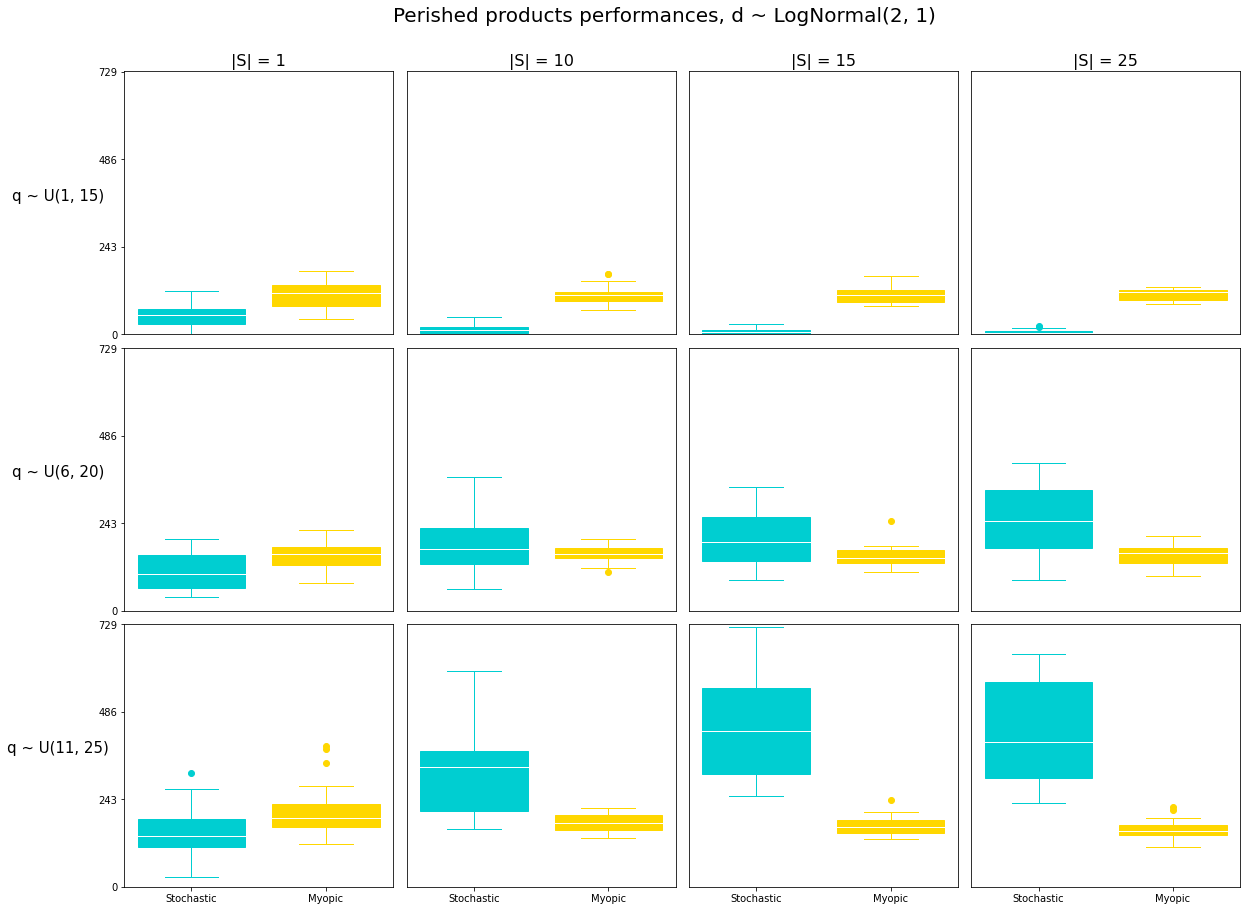

In [13]:
inst, num_episodes, keys, S, q, d = import_instances_Sqd()
display_metrics_Sqd(inst, num_episodes, keys, S, q, d)